各種ライブラリをインポートする  
ライブラリが無いエラーが出る場合は`!pip install numpy`のようにしてインストールする

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
t=iris.target

In [2]:
iris = load_iris()
iris_data = iris.data[:100]
iris_target_data = pd.DataFrame(iris.target[:100], columns=['Species'])
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
print(iris_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
..                ...               ...                ...               ...
95                5.7               3.0                4.2               1.2
96                5.7               2.9                4.2               1.3
97                6.2               2.9                4.3               1.3
98                5.1               2.5                3.0               1.1
99                5.7               2.8                4.1               1.3

[100 rows x 4 columns]


In [24]:
#Dataframeのapplyメソッドを使用する
def species(num):
    if num == 0:
        return 'setosa'
    else:
        return 'versicolor'

iris_target_speacies = iris_target_data['Species'].apply(species)
print(iris_target_speacies)
# iris_dfとiris_target_speaciesを横方向に結合


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: Species, Length: 100, dtype: object


In [25]:
iris_all_data = pd.concat([iris_df, iris_target_speacies], axis=1)
print(iris_all_data)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

       Species  
0       setosa  
1    

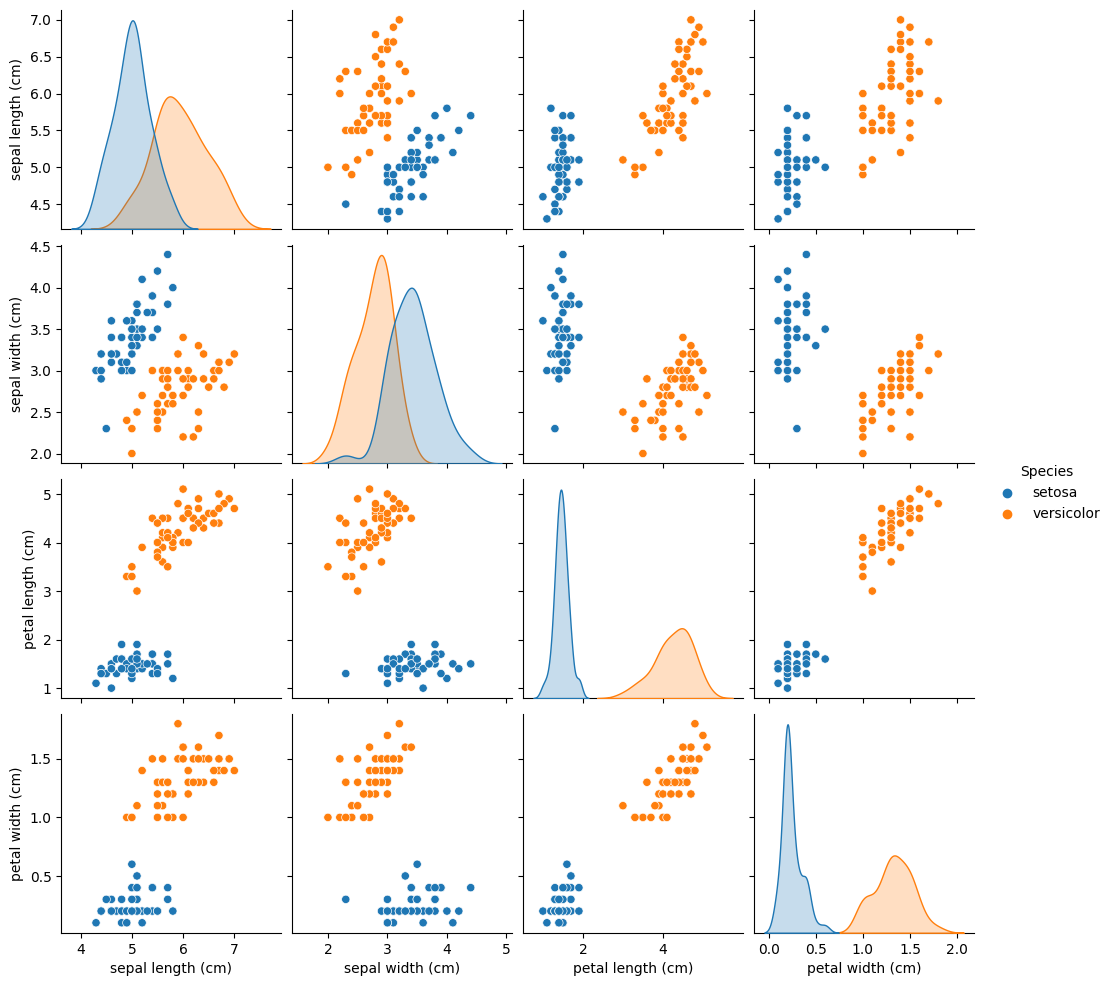

In [27]:
#データを可視化
sns.pairplot(iris_all_data, hue='Species')
plt.show()


/home/koumon/miniconda3/envs/jp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


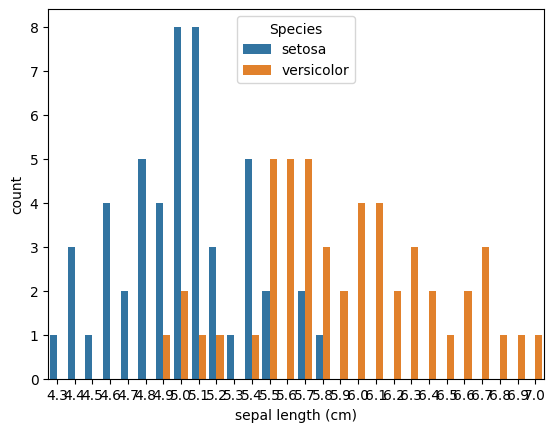

In [26]:
#sepal lengthの度数表
sns.countplot('sepal length (cm)', data=iris_all_data, hue='Species')
plt.show()


In [29]:
#データをテスト用とトレー二ング用に分けて学習
X_train, X_test, Y_train, Y_test = train_test_split(iris_df, iris_target_data)
logistic_model2 = LogisticRegression()

In [31]:
#logistic_model2.fit(X_train, Y_train) を書き換えてワーニングを回避
logistic_model2.fit(X_train , Y_train.values.ravel())
coeff_df2 = DataFrame([iris_df.columns, logistic_model2.coef_[0]]).T
print(coeff_df2)
print(logistic_model2.score(X_test, Y_test))

                   0         1
0  sepal length (cm)  0.513517
1   sepal width (cm) -0.662731
2  petal length (cm)  2.147498
3   petal width (cm)   0.83751
1.0


In [32]:
#データセットの準備
from sklearn import datasets # データロード用
#from sklearn.cross_validation import train_test_split # 学習/テストデータ作成用
from sklearn. model_selection import train_test_split # 修正(警告無し)
from sklearn import metrics # 精度評価用
from sklearn.naive_bayes import GaussianNB # ガウシアンナイーブベイズ実行用

In [19]:
# データ用意
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [20]:
# ガウシアンナイーブベイズ実行
model = GaussianNB() # インスタンス生成
model.fit(X_train, Y_train) # モデル作成実行

GaussianNB()

In [21]:
# 予測実行
predicted = model.predict(X_test) # 予測実行
metrics.accuracy_score(Y_test, predicted) # 精度計算

1.0